# Santa Catarina

In [40]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc
import plotly.offline as pyo

In [41]:
tab = pd.read_csv('C:\\GESAD\\Inputs\\tabela6805_SC.csv') # Dados IBGE 2022 
tab.head() 

,Cód,Município,Total,"Rede geral, rede pluvial ou fossa ligada à rede",Rede geral ou pluvial,Fossa séptica ou fossa filtro ligada à rede,Fossa séptica ou fossa filtro não ligada à rede,Fossa rudimentar ou buraco,Vala,"Rio, lago, córrego ou mar",Outra forma,Não tinham banheiro nem sanitário
0,4200051,Abdon Batista,100,32.2,31.06,1.14,34.26,32.61,0.31,-,0.31,0.31
1,4200101,Abelardo Luz,100,2.34,1.91,0.43,18.54,78.44,0.41,0.22,0.03,0.02
2,4200200,Agrolândia,100,53.42,14.61,38.81,41.49,3.83,0.77,0.43,0.05,-
3,4200309,Agronômica,100,40.87,7.27,33.6,45,12.25,1.12,0.76,-,-
4,4200408,Água Doce,100,21.48,10.7,10.78,55.6,22.55,0.12,0.16,0.08,-


In [42]:
tab.replace('-', 0, inplace=True)
tab

,Cód,Município,Total,"Rede geral, rede pluvial ou fossa ligada à rede",Rede geral ou pluvial,Fossa séptica ou fossa filtro ligada à rede,Fossa séptica ou fossa filtro não ligada à rede,Fossa rudimentar ou buraco,Vala,"Rio, lago, córrego ou mar",Outra forma,Não tinham banheiro nem sanitário
0,4200051,Abdon Batista,100,32.2,31.06,1.14,34.26,32.61,0.31,0,0.31,0.31
1,4200101,Abelardo Luz,100,2.34,1.91,0.43,18.54,78.44,0.41,0.22,0.03,0.02
2,4200200,Agrolândia,100,53.42,14.61,38.81,41.49,3.83,0.77,0.43,0.05,0
3,4200309,Agronômica,100,40.87,7.27,33.6,45,12.25,1.12,0.76,0,0
4,4200408,Água Doce,100,21.48,10.7,10.78,55.6,22.55,0.12,0.16,0.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
290,4219507,Xanxerê,100,12.32,8.52,3.79,57.63,28.55,0.3,1.11,0.08,0
291,4219606,Xavantina,100,23.94,2,21.95,55.63,19.79,0.4,0,0.24,0
292,4219705,Xaxim,100,7.44,4.1,3.34,64.49,27.58,0.06,0.36,0.07,0
293,4219853,Zortéa,100,0.68,0.48,0.21,93.37,5.67,0.14,0.14,0,0


In [43]:
# string para float
tab[[
    'Rede geral, rede pluvial ou fossa ligada à rede', 'Rede geral ou pluvial', 
     'Fossa séptica ou fossa filtro ligada à rede', 'Fossa séptica ou fossa filtro não ligada à rede',
     'Fossa rudimentar ou buraco', 'Vala', 'Rio, lago, córrego ou mar', 'Outra forma', 
     'Não tinham banheiro nem sanitário']] = tab[[
    'Rede geral, rede pluvial ou fossa ligada à rede', 'Rede geral ou pluvial', 
     'Fossa séptica ou fossa filtro ligada à rede', 'Fossa séptica ou fossa filtro não ligada à rede',
     'Fossa rudimentar ou buraco', 'Vala', 'Rio, lago, córrego ou mar', 'Outra forma', 
     'Não tinham banheiro nem sanitário'
    ]].astype(float)

In [44]:
# GeoJSON
geojson_url = 'https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-42-mun.json'

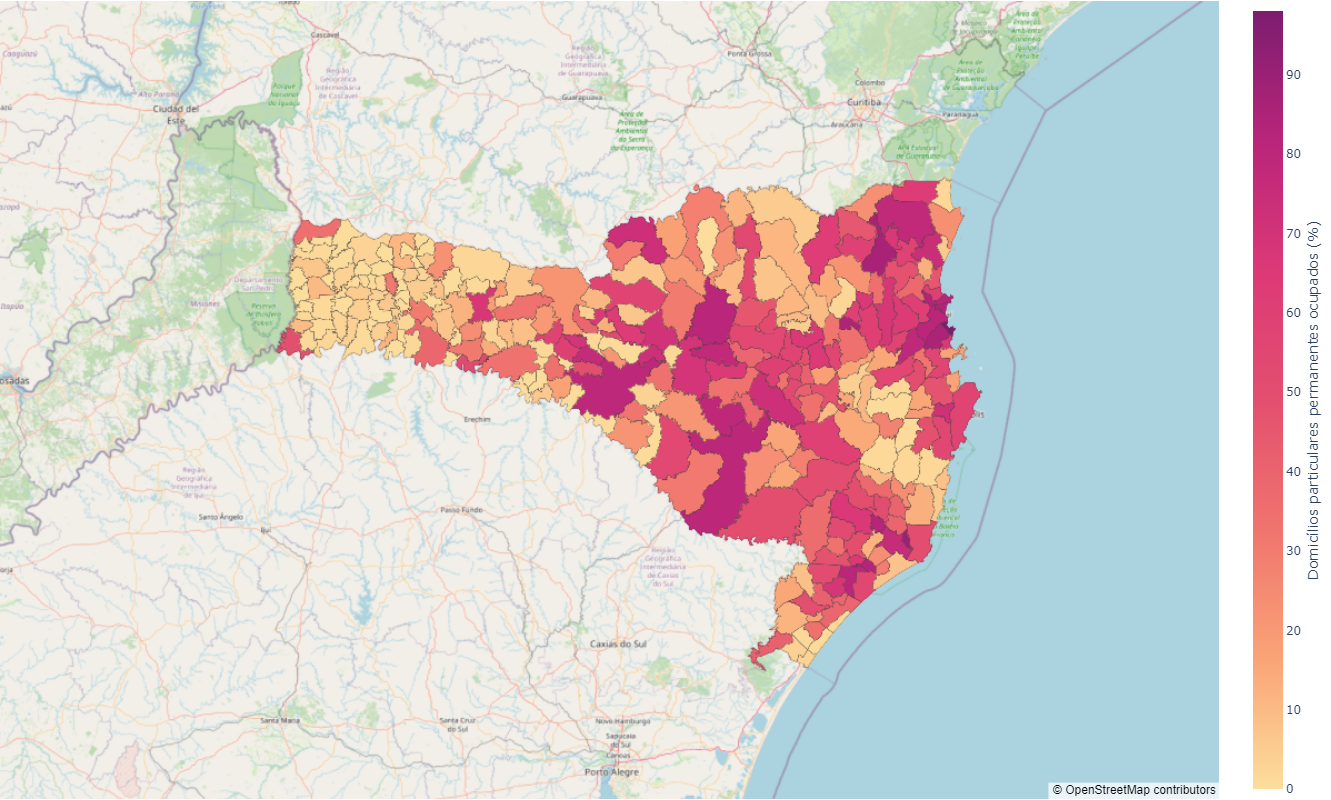

In [45]:
# Mapa
fig = px.choropleth_mapbox(
    data_frame = tab,
    geojson = geojson_url,
    locations = 'Município',
    featureidkey = 'properties.name',
    color = 'Rede geral, rede pluvial ou fossa ligada à rede',
    color_continuous_scale = 'sunsetdark',
    range_color = (tab['Rede geral, rede pluvial ou fossa ligada à rede'].min(), tab['Rede geral, rede pluvial ou fossa ligada à rede'].max()),
    mapbox_style = 'open-street-map',
    zoom = 6.5,
    center = {"lat": -27.5, "lon": -51.25},
    opacity = 1,
    width = 1200,
    height = 800,
    labels = {'Rede geral, rede pluvial ou fossa ligada à rede': 'Rede geral, rede pluvial ou fossa ligada à rede (%)'},
    hover_name = 'Município', 
    hover_data = {'Município': False}
)


# layout
fig.update_layout(
    margin={'r': 0, 't': 1, 'l': 0, 'b': 1},
    coloraxis_colorbar={
        'title': {
            'text': 'Domicílios particulares permanentes ocupados (%)',
            'side': 'right'
        }
    }
)

fig.update_geos(
    showcoastlines=False,  
    visible=False  
)

fig.update_traces(
    marker_line_width=0.05,
    selector=dict(type='choroplethmapbox')
)

fig.show()

In [39]:
pyo.offline.plot(fig, filename = 'mapaSC.html') # criando o arquivo html

'mapaSC.html'